In [2]:
import csv
import os

import math
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

### ME-GraphAU

In [8]:
# Load Data
me_data_frames = {}
for (root, dirs, file) in os.walk("megraph_results"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            me_data_frames[f] = df

In [9]:
len(me_data_frames)

165

In [ ]:
# Drop Columns
for k in me_data_frames.keys():
    df = me_data_frames[k]
    column_labels_list = df.columns.tolist()
    # print("Dropping column for: ", k)
    for label in column_labels_list:
        if 'Unnamed: 0' in label:
            df = df.drop(columns='Unnamed: 0')
        if 'L' in label:
            df = df.drop(columns=label)
        if 'R' in label:
            df = df.drop(columns=label)
    me_data_frames[k] = df

In [11]:
print(me_data_frames["pre-04-014_part_2_MEGraph_res.csv"][0:2])

     AU1    AU2    AU4   AU5    AU6    AU7    AU9   AU10   AU11   AU12  ...  \
0  29.58  13.47  82.80  8.00  62.82  30.46  12.39  17.88  37.94  12.89  ...   
1  30.09  13.56  83.76  7.64  61.92  30.86  12.10  18.63  39.46  13.23  ...   

    AU20  AU22   AU23   AU24   AU25   AU26  AU27  AU32   AU38   AU39  
0  16.19  7.91  15.17  20.51  22.27  10.48  8.48  5.68  13.28  12.77  
1  16.30  7.68  16.62  21.75  22.83  10.97  8.41  5.30  12.36  12.21  

[2 rows x 27 columns]


In [12]:
# Rename Features
for k in me_data_frames.keys():
    df = me_data_frames[k]
    df.columns = df.columns.str.replace('AU', 'me_graph_AU')
    #me_data_frames[k] = df

In [13]:
print(me_data_frames["pre-04-014_part_2_MEGraph_res.csv"][0:2])

   me_graph_AU1  me_graph_AU2  me_graph_AU4  me_graph_AU5  me_graph_AU6  \
0         29.58         13.47         82.80          8.00         62.82   
1         30.09         13.56         83.76          7.64         61.92   

   me_graph_AU7  me_graph_AU9  me_graph_AU10  me_graph_AU11  me_graph_AU12  \
0         30.46         12.39          17.88          37.94          12.89   
1         30.86         12.10          18.63          39.46          13.23   

   ...  me_graph_AU20  me_graph_AU22  me_graph_AU23  me_graph_AU24  \
0  ...          16.19           7.91          15.17          20.51   
1  ...          16.30           7.68          16.62          21.75   

   me_graph_AU25  me_graph_AU26  me_graph_AU27  me_graph_AU32  me_graph_AU38  \
0          22.27          10.48           8.48           5.68          13.28   
1          22.83          10.97           8.41           5.30          12.36   

   me_graph_AU39  
0          12.77  
1          12.21  

[2 rows x 27 columns]


### LibreFace

In [14]:
# Load Data
libre_data_frames = {}
for (root, dirs, file) in os.walk("libreface_features_csv"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            libre_data_frames[f] = df

In [15]:
print(libre_data_frames["91-001_part_2_results.csv"][0:2])
len(libre_data_frames)

      au1_d     au2_d     au4_d     au6_d     au7_d    au10_d    au12_d  \
0  0.244537  0.588385  0.506791  0.480943  0.625119  0.821558  0.479954   
1  0.287383  0.656716  0.528421  0.503903  0.617207  0.829716  0.487434   

     au14_d    au15_d    au17_d  ...     au5_i     au6_i     au9_i    au12_i  \
0  0.014369  0.000917  0.026635  ...  0.049410  0.041506  0.055842  0.253342   
1  0.015756  0.000905  0.027747  ...  0.051378  0.044465  0.059174  0.256453   

     au15_i    au17_i    au20_i    au25_i    au26_i  frame  
0  0.033510  0.040307  0.049689  0.391612  0.040814      1  
1  0.034027  0.041201  0.051156  0.408797  0.039705      2  

[2 rows x 25 columns]


165

In [16]:
# Drop Columns
print("Dropping 'frame' column")
for k in libre_data_frames.keys():
    df = libre_data_frames[k]    
    if 'frame' in df.columns.tolist():
            df = df.drop(columns='frame')
    libre_data_frames[k] = df

Dropping 'frame' column


In [17]:
print(libre_data_frames["91-001_part_2_results.csv"][0:2])

      au1_d     au2_d     au4_d     au6_d     au7_d    au10_d    au12_d  \
0  0.244537  0.588385  0.506791  0.480943  0.625119  0.821558  0.479954   
1  0.287383  0.656716  0.528421  0.503903  0.617207  0.829716  0.487434   

     au14_d    au15_d    au17_d  ...     au4_i     au5_i     au6_i     au9_i  \
0  0.014369  0.000917  0.026635  ...  0.114357  0.049410  0.041506  0.055842   
1  0.015756  0.000905  0.027747  ...  0.115769  0.051378  0.044465  0.059174   

     au12_i    au15_i    au17_i    au20_i    au25_i    au26_i  
0  0.253342  0.033510  0.040307  0.049689  0.391612  0.040814  
1  0.256453  0.034027  0.041201  0.051156  0.408797  0.039705  

[2 rows x 24 columns]


In [35]:
# Rename Features
for k in libre_data_frames.keys():
    df = libre_data_frames[k]
    df.columns = df.columns.str.replace('au', 'libreface_AU0')
    #me_data_frames[k] = df

In [36]:
print(libre_data_frames["91-001_part_2_results.csv"][0:2])

   libreface_AU01_d  libreface_AU02_d  libreface_AU04_d  libreface_AU06_d  \
0          0.244537          0.588385          0.506791          0.480943   
1          0.287383          0.656716          0.528421          0.503903   

   libreface_AU07_d  libreface_AU010_d  libreface_AU012_d  libreface_AU014_d  \
0          0.625119           0.821558           0.479954           0.014369   
1          0.617207           0.829716           0.487434           0.015756   

   libreface_AU015_d  libreface_AU017_d  ...  libreface_AU04_i  \
0           0.000917           0.026635  ...          0.114357   
1           0.000905           0.027747  ...          0.115769   

   libreface_AU05_i  libreface_AU06_i  libreface_AU09_i  libreface_AU012_i  \
0          0.049410          0.041506          0.055842           0.253342   
1          0.051378          0.044465          0.059174           0.256453   

   libreface_AU015_i  libreface_AU017_i  libreface_AU020_i  libreface_AU025_i  \
0           

### OpenFace

In [20]:
# Load Data
of_data_frames = {}
for (root, dirs, file) in os.walk("open_face_features/open_face_features_participants"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            of_data_frames[f] = df
            
print("participants in data subset: ", len(of_data_frames))
#print("\nlist of files:")
#print(of_data_frames.keys())

participants in data subset:  165


In [21]:
# Drop Columns
print("Dropping any column containing 'eye', 'gaze' or 'pose'")
for k in of_data_frames.keys():
    df = of_data_frames[k]
    labels = df.columns.tolist()
    
    # get list of labels with certain substring
    # and drop corresponding columns
    eyes = [l for l in labels if 'eye' in l]
    df = df.drop(columns=eyes)
    gaze = [l for l in labels if 'gaze' in l]
    df = df.drop(columns=gaze)
    pose = [l for l in labels if 'pose' in l]
    df = df.drop(columns=pose)
    
    of_data_frames[k] = df

Dropping any column containing 'eye', 'gaze' or 'pose'


In [22]:
test_file = list(of_data_frames.keys())[0]
print(of_data_frames[test_file].head())

   Unnamed: 0  frame  face_id  timestamp  confidence  success  AU01_r  AU02_r  \
0           0      1        0   0.000000        0.98        1    1.87    0.48   
1           1      2        0   0.032848        0.98        1    1.77    0.65   
2           2      3        0   0.065697        0.98        1    1.67    0.71   
3           3      4        0   0.098545        0.98        1    1.66    0.72   
4           4      5        0   0.131394        0.98        1    1.65    0.69   

   AU04_r  AU05_r  ...  AU12_c  AU14_c  AU15_c  AU17_c  AU20_c  AU23_c  \
0    0.15     0.0  ...     1.0     1.0     1.0     0.0     1.0     0.0   
1    0.27     0.0  ...     1.0     0.0     0.0     0.0     1.0     0.0   
2    0.36     0.0  ...     1.0     1.0     1.0     0.0     1.0     0.0   
3    0.42     0.0  ...     0.0     0.0     1.0     0.0     1.0     0.0   
4    0.46     0.0  ...     0.0     0.0     1.0     0.0     1.0     0.0   

   AU25_c  AU26_c  AU28_c  AU45_c  
0     1.0     0.0     1.0     1.

In [23]:
# Rename Features
for k in of_data_frames.keys():
    df = of_data_frames[k]
    df.columns = df.columns.str.replace('AU', 'openface_AU')

## Combine Data

In [24]:
# libre_data_frames
# me_data_frames
# of_data_frames

# match correct participants together
def find_common_substring(str1, str2):
    ## code by copilot
    common_substring = ''
    # Start from the end of the first string and the beginning of the second string
    for i in range(len(str1)):
        for j in range(len(str2)):
            # Initialize a substring variable to store the matching characters
            substring = ''
            # Compare characters while they are the same and within the string boundaries
            while (i + len(substring) < len(str1) and
                   j + len(substring) < len(str2) and
                   str1[i + len(substring)] == str2[j + len(substring)]):
                substring += str1[i + len(substring)]
            # Update the common substring if the current one is longer
            if len(substring) > len(common_substring):
                common_substring = substring
    return common_substring

In [25]:
# check for same size
if not len(list(me_data_frames)) is len(list(libre_data_frames)):
    print("failure, length of given lists not the same")
if not len(list(of_data_frames)) is len(list(me_data_frames)):
    print("failure, length of given lists not the same")

In [37]:

new_data_frames = {}
# get key indices
for i in range(len(list(me_data_frames))):
    # get keys at i
    me_key = list(me_data_frames)[i]
    lib_key = list(libre_data_frames)[i]
    of_key = list(of_data_frames)[i]
    
    # get data frames at i
    me = me_data_frames[me_key]
    lib = libre_data_frames[lib_key]
    of = of_data_frames[of_key]
    
    # create new file name
    merge_string_1 = find_common_substring(me_key, lib_key)
    merge_string_2 = find_common_substring(of_key, lib_key)
    new_file_name = find_common_substring(merge_string_1, merge_string_2)
    if not new_file_name:
        print("error, empty string for index ", i)
        new_file_name = "unknown_index_"+i
    new_file_name = new_file_name + "_concat.csv"
    
    # concat dataframes
    result = pd.concat([of, me, lib], axis=1)
    new_data_frames[new_file_name] = result

In [ ]:
print(new_data_frames[list(new_data_frames)[0]])
print(list(new_data_frames)[0])

## Save in files

In [40]:
for k in new_data_frames.keys():
    save_path = "concat_features/" + k
    
    df = new_data_frames[k]
    df.to_csv(save_path) 

# Standardize Data Ranges

openface_r has originally intensity ranges between 0 and 5, so I divide by 5

me_graph has percentages as values between 0 and 100, so I divide by 100

In [6]:
# Load Data
all_data = {}
for (root, dirs, file) in os.walk("raw_data/all_features_raw"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            all_data[f] = df

# go though data
#df.replace({'A': r'^openface_AU.$'}, {'A': 'new'}, regex=True)
# regular expression: r'^openface_AU.$'

In [7]:
## Standardize Data

# get list of labels with certain substring
first_entry = list(all_data.values())[0]
labels = first_entry.columns.tolist()
of_columns = [l for l in labels if 'openface_AU' in l and '_r' in l]
me_columns = [l for l in labels if 'me_graph_AU' in l]

for k in all_data.keys():
    df = all_data[k]
    
    for column in of_columns:
        # scale data down to [0,1]
        df[column] = [x / 5 for x in df[column]]
    
    for column in me_columns:
        # scale data down to [0,1]
        df[column] = [x / 100 for x in df[column]]
            

In [8]:
print(first_entry[0:2])

   Unnamed: 0.1  Unnamed: 0  frame  face_id  timestamp  confidence  success  \
0             0           0      1        0   0.000000        0.98        1   
1             1           1      2        0   0.032848        0.98        1   

   openface_AU01_r  openface_AU02_r  openface_AU04_r  ...  libreface_AU04_i  \
0            0.374            0.096            0.030  ...          0.114357   
1            0.354            0.130            0.054  ...          0.115769   

   libreface_AU05_i  libreface_AU06_i  libreface_AU09_i  libreface_AU012_i  \
0          0.049410          0.041506          0.055842           0.253342   
1          0.051378          0.044465          0.059174           0.256453   

   libreface_AU015_i  libreface_AU017_i  libreface_AU020_i  libreface_AU025_i  \
0           0.033510           0.040307           0.049689           0.391612   
1           0.034027           0.041201           0.051156           0.408797   

   libreface_AU026_i  
0           0.040814  

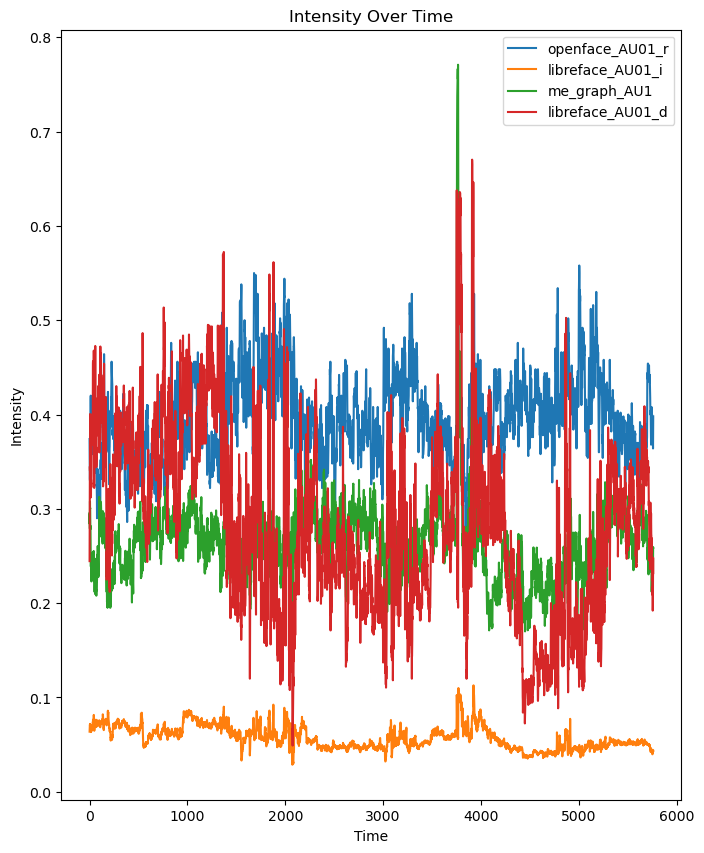

In [10]:
first_entry.plot(kind='line', y=["openface_AU01_r", "libreface_AU01_i", "me_graph_AU1", "libreface_AU01_d"], subplots=False, figsize=(8, 10))
plt.title('Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

In [11]:
for k in all_data.keys():
    save_path = "all_features/" + k
    
    df = all_data[k]
    df.to_csv(save_path) 

# Participant Info

In [18]:
# Load Data
df = pd.read_csv("raw_data/participant_info/ids.csv")
# Convert the DataFrame to a dictionary
info = df.set_index('id')['SITCondition.ASD'].to_dict()

In [31]:
# List of used participants
with open("raw_data/participant_info/participants.txt", "r") as f:
    participants = f.readlines()
all_participants = list(map(lambda x: x.strip(), participants))

In [40]:
participants = set(all_participants)
remaining_participants = set(all_participants)

In [41]:
# find matching participants
part_info = {}
for k in info.keys():
    for p in participants:
        if k in p:
            #print(f"{k} in {p}")
            part_info[p] = info[k]
            remaining_participants.remove(p)
            continue
            
print("remaining participants: ", remaining_participants)

remaining participants:  {'pre-91-020_part_1'}


remaining participants:  {'pre-91-020_part_1'}
Missing participant info:

22_hu: 110	91-020	33(age)	2(gender)

In [42]:
# save ids and asc-flag
df = pd.DataFrame(part_info.items(), columns=['id', 'ASC'])
df = df.sort_values('id')
df.to_csv("participant_info.csv") 